## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 20.91 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
#1
import pandas as pd
import numpy as np


In [12]:
df =pd.read_csv("./kmc/data/airbnb_hw.csv")
df['price'] = df['Price']
df['beds'] = df['Beds']
df['n_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']


In [13]:
var = "price"
print(df[var].value_counts())
df[var] = df[var].str.replace(',','')
df[var]= pd.to_numeric(df[var],errors = 'coerce')
df[var].describe()

150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: price, Length: 511, dtype: int64


count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: price, dtype: float64

In [15]:
var = "beds"
df[var].unique()
df[var]=df[var].fillna(1)

array([ 1.,  3.,  2.,  4.,  5., nan,  6., 10.,  7.,  8., 12.,  0., 16.,
        9., 11.])

In [16]:
var = "n_reviews"
df[var].unique()
#all good


array([  0,   1,  39,   4,   9,  80,  95,  23,  14, 120,  81,  17,  32,
        52,   3, 171,  16,  19,   2,  28,  62,   6,   5,  12,  40,  47,
        13,  35,  34,  68,  42,   7,  41,  15,  21,   8,  10,  29, 112,
        25, 132,  51, 156,  30,  98,  24,  74,  20, 188, 221,  57,  11,
       242,  67, 118,  60, 136, 119,  79, 106,  43,  91, 105,  96, 141,
       146,  63,  58,  18, 150,  38,  55,  89,  46,  77,  48,  36,  69,
        26,  73,  53, 165,  92,  87, 108, 109,  50, 127,  88,  83, 184,
       179,  22,  31,  82,  27, 123, 247, 190, 257, 217,  85, 103, 157,
       102,  56, 125, 115,  49,  97,  54,  65,  90,  44,  33, 100,  37,
       107, 114, 116,  61, 104,  71,  75, 145,  84,  93, 110, 172, 148,
       131, 154,  86,  64,  76, 129,  45, 180, 140,  78, 200, 175, 189,
       170, 187,  72, 137,  99, 101,  59,  94, 124, 223, 173, 151, 142,
       163, 121, 256, 248, 149, 128, 133,  66, 117, 176, 111,  70, 183,
       218, 192, 206, 161, 216, 191, 213, 178, 122, 153, 177, 16

In [23]:
var = "score"
df[var].unique()
df[var].describe()
X = df.loc[:,['score','beds','price','n_reviews']]
X = X.dropna()

In [24]:
#2

def maxmin(x):
  u = (x-min(x)/max(x)-min(x))
  return u

Y = X.drop('price', axis = 1)
Y = Y.apply(maxmin)

In [25]:
#3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters=6, max_iter=300, n_init=10, random_state=0)
model = model.fit(Y)
Y['cluster'] = model.labels_

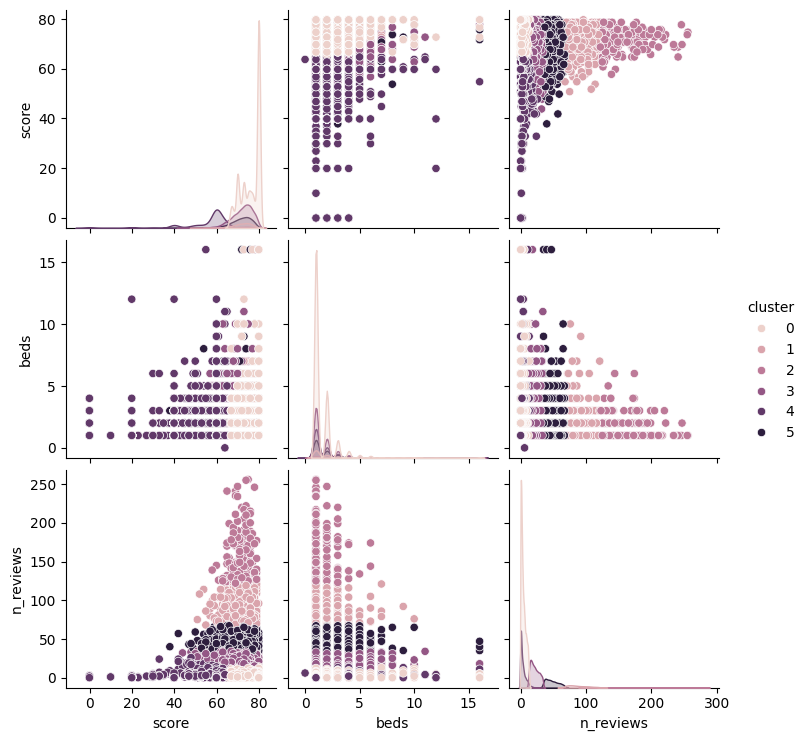

In [26]:
#4

import seaborn as sns
sns.pairplot(data = Y, hue = 'cluster')

In [30]:
#5

X['cluster'] = model.labels_
X.loc[:,['price','cluster']].groupby('cluster').describe()


price                                                            
           count        mean         std   min   25%    50%     75%      max
cluster                                                                     
0        11970.0  159.198329  138.114213  10.0  85.0  130.0  195.00   4500.0
1          819.0  135.700855   84.884185  27.0  82.0  115.0  165.00    875.0
2          184.0  125.000000   70.377126  33.0  78.0  100.0  161.25    550.0
3         4226.0  162.071936  193.859246  20.0  89.0  135.0  195.00  10000.0
4         2911.0  138.500859  161.064284  21.0  70.0  105.0  170.00   5000.0
5         2001.0  147.385807   97.534830  22.0  89.0  125.0  180.00   1500.0

<Axes: >

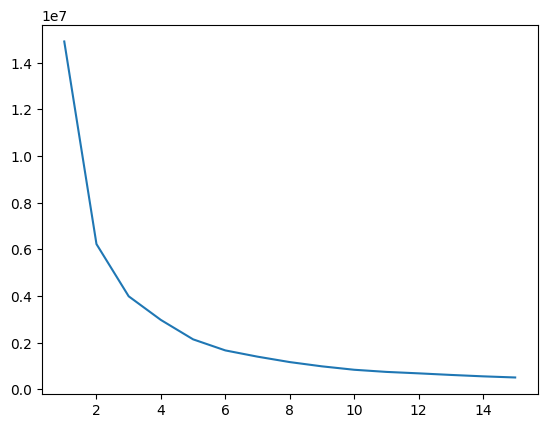

In [32]:
#6

k_bar = 15
k_grid = np.arange(1, k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KMeans(n_clusters = k+1, max_iter=300, n_init = 10, random_state = 0)
  model = model.fit(Y)
  SSE[k] = model.inertia_

sns.lineplot(x = k_grid, y = SSE)

price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        17395.0  156.459960  159.024308  10.0  85.0  128.0  192.0  10000.0
1         3823.0  152.295056  107.103061  22.0  89.0  128.0  185.0   1500.0
2          893.0  133.156775   82.076690  27.0  80.0  110.0  165.0    875.0

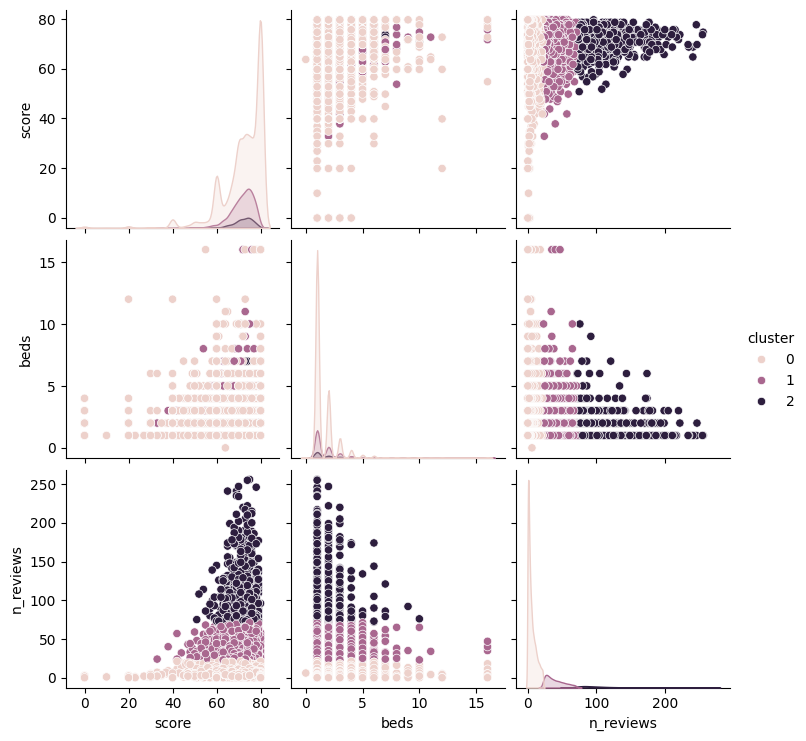

In [33]:
model = KMeans(n_clusters=3, max_iter = 300, n_init=10, random_state=0)
model = model.fit(Y)
Y['cluster'] = model.labels_


sns.pairplot(data = Y, hue = 'cluster')
X['cluster'] = model.labels_
X.loc[:,['price','cluster']].groupby('cluster').describe()


**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [34]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

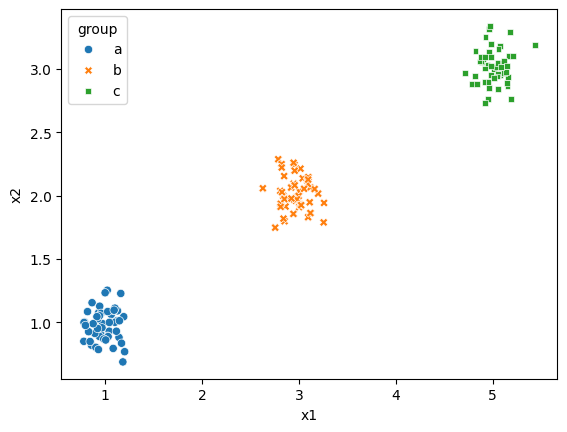

In [35]:
sns.scatterplot(data = df0_125, x = 'x1', y = 'x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

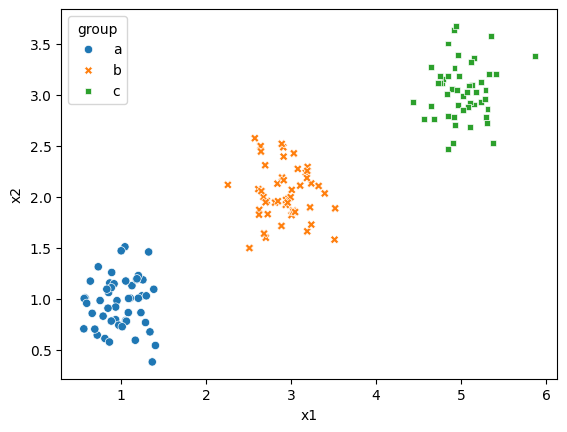

In [36]:
sns.scatterplot(data = df0_25, x = 'x1', y = 'x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

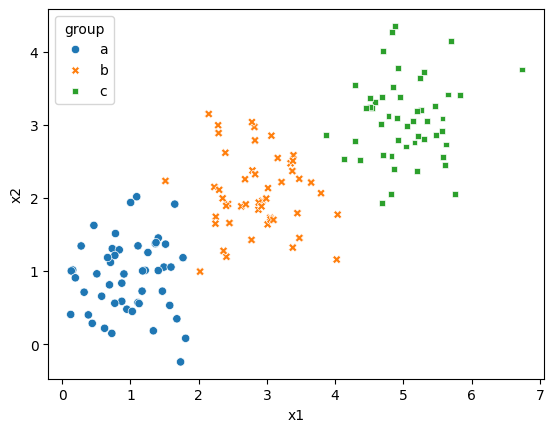

In [37]:
sns.scatterplot(data = df0_5, x = 'x1', y = 'x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

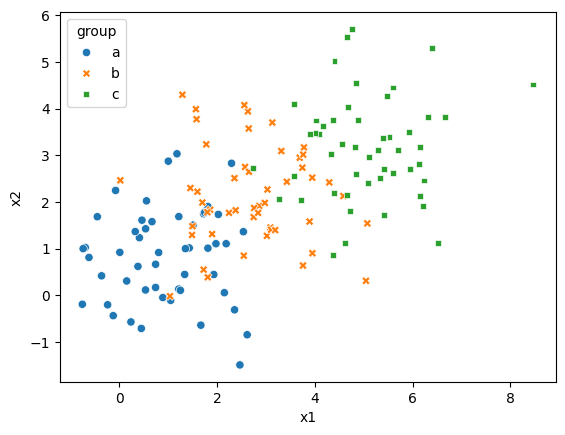

In [38]:
sns.scatterplot(data = df1_0, x = 'x1', y = 'x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

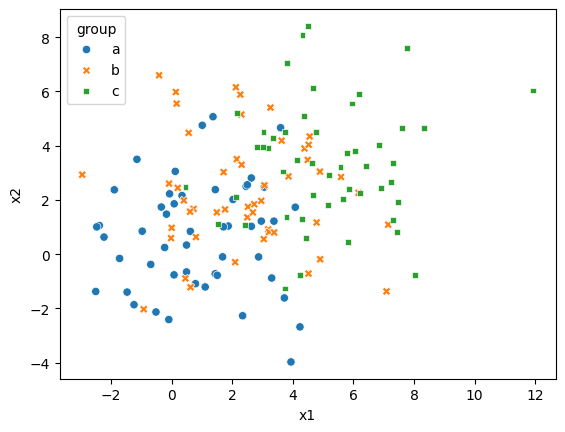

In [39]:
sns.scatterplot(data = df2_0, x = 'x1', y = 'x2', hue='group', style='group')

As the noise goes up the visual distinctness goes way down. If thge hue and styles were not there by noise levels 1 and 2 the groups would not be observable

In [50]:
#3

def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
def scree(data):
  Y = data.loc[:,['x1','x2']]
  Y = Y.apply(maxmin)
  k_bar = 15
  k_grid = np.arange(1, k_bar+1)
  SSE = np.zeros(k_bar)
  for k in range(k_bar):
    model = KMeans(n_clusters = k+1, max_iter=300, n_init = 10, random_state = 0)
    model = model.fit(Y)
    SSE[k] = model.inertia_
  scree_plot, axes = plt.subplots()
  sns.lineplot(x = k_grid, y = SSE)
  axes.set_ylim(0,35)

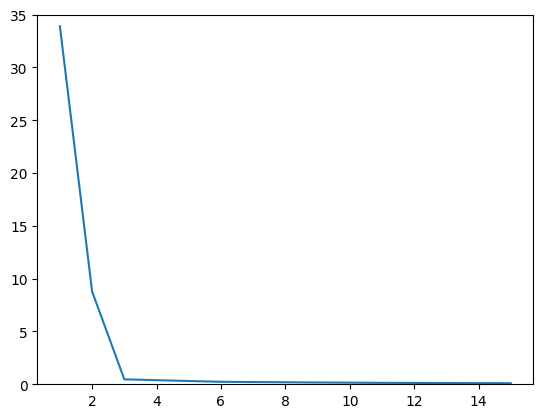

In [51]:
scree(data = df0_125)
#elbow at 3

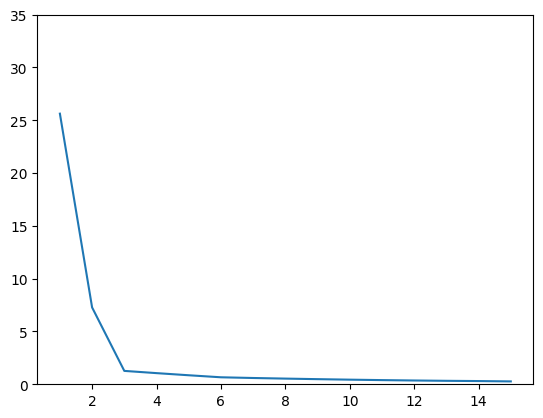

In [52]:
scree(df0_25)
#elbow at 3

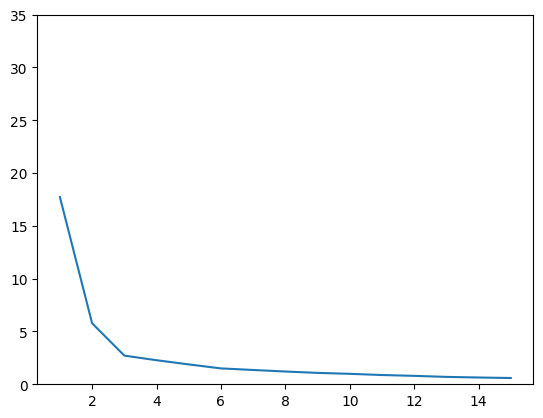

In [53]:
scree(df0_5)
#less noticable elbow at 3

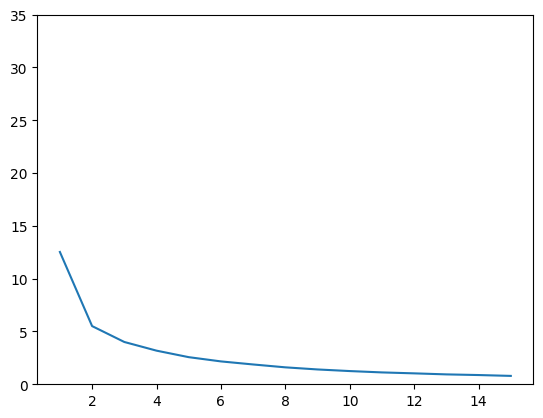

In [54]:
scree(df1_0)
#not very noticable elbow at 2

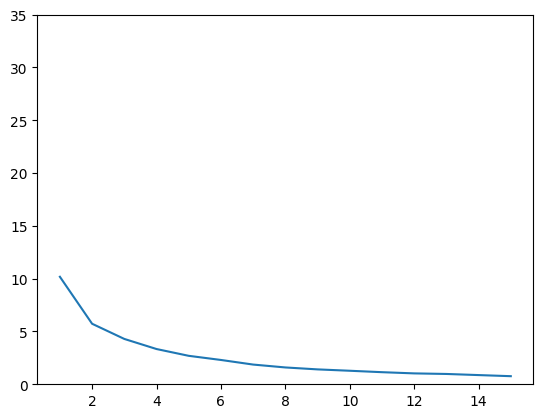

In [55]:
scree(df2_0)
#no elbow

The intuition of the elbows is when the adding of clusters are no longer helpful to discern groups. The elbows show us that SSE is very high untill that point but after that point the SSE imporvements with adding more clusters is marginal and may not be helping us discern more groups better. In this simulation we can see that the elbow  shows us how many groups there are easily when the noise is very low and it is also easy for us to pick out the groups with our own eyes, As the noise raises the elbow goes away because adding more groups is not helping to seperate the groups at all or to add any understanding

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?